In [114]:
import pandas as p
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import kurtosistest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [115]:
housing = (r"housing.csv")
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT', 'MEDV']
df = p.read_csv('housing.csv', delim_whitespace=True,names=names)

In [116]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


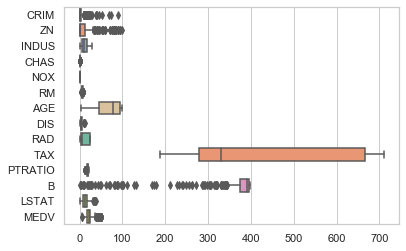

In [118]:
sns.set(style="whitegrid",color_codes=True)
ax = sns.boxplot(data=df, orient="h", palette="Set2")


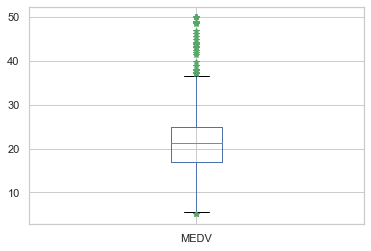

In [119]:
df.boxplot(column =['MEDV'], sym = 'g*');

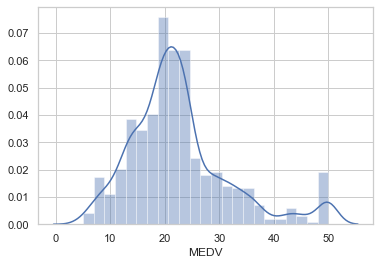

In [120]:
#permet de visualiser la distribution d'une variable continue en 
#affichant un histogramme de la variable, ainsi que l'estimation par noyau de sa densité.
sns.distplot(df.MEDV);

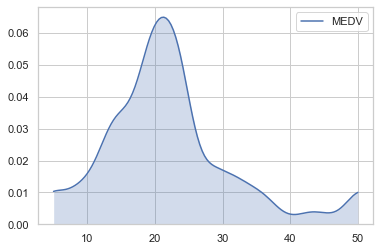

In [121]:
sns.kdeplot(df.MEDV, shade=True, cut = 0);# pour afficher la densite estimé (curva )utiliser la fonction kdeplot

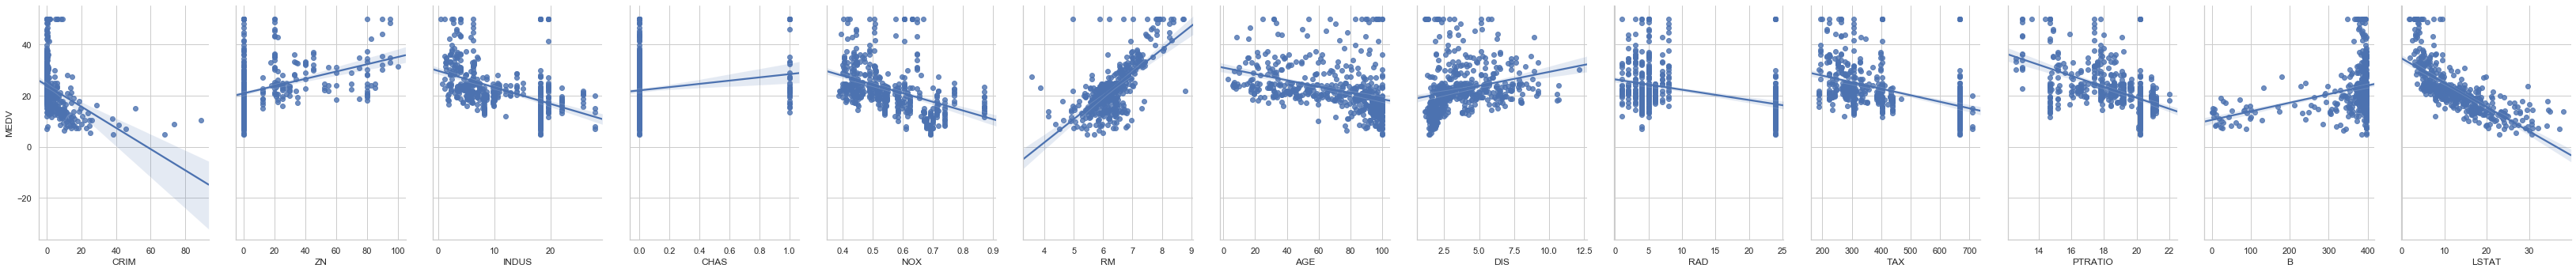

In [122]:
df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [123]:
df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [124]:
#Amplitude
df.max()-df.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
MEDV        45.00000
dtype: float64

In [125]:
df.iloc[:,0:4]

,CRIM,ZN,INDUS,CHAS
0,0.00632,18.0,2.31,0
1,0.02731,0.0,7.07,0
2,0.02729,0.0,7.07,0
3,0.03237,0.0,2.18,0
4,0.06905,0.0,2.18,0
5,0.02985,0.0,2.18,0
6,0.08829,12.5,7.87,0
7,0.14455,12.5,7.87,0
8,0.21124,12.5,7.87,0
9,0.17004,12.5,7.87,0


In [126]:
df.iloc[:,0:4].max()

CRIM      88.9762
ZN       100.0000
INDUS     27.7400
CHAS       1.0000
dtype: float64

In [127]:
df.iloc[:,0:4].min()

CRIM     0.00632
ZN       0.00000
INDUS    0.46000
CHAS     0.00000
dtype: float64

In [128]:
amplitude = df.iloc[:,0:4].max()-df.iloc[:,0:4].min()
amplitude

CRIM      88.96988
ZN       100.00000
INDUS     27.28000
CHAS       1.00000
dtype: float64

In [129]:
# l'intervalle inter quantile : dq=Q3-Q1

df.quantile(0.25)

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
MEDV        17.025000
Name: 0.25, dtype: float64

In [130]:
df.quantile(0.75)

CRIM         3.677082
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT       16.955000
MEDV        25.000000
Name: 0.75, dtype: float64

In [131]:
dqt= df.quantile(0.75)-df.quantile(0.25)
dqt

CRIM         3.595037
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64

In [132]:
#Variance
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64

In [133]:
#écart-type
df.std()


CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [134]:
#moyenne
df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [135]:
#coeffiscient de variation
cv = df.std()/df.mean()*100
cv


CRIM       238.037610
ZN         205.237586
INDUS       61.600874
CHAS       367.202814
NOX         20.890339
RM          11.179921
AGE         41.048344
DIS         55.485809
RAD         91.181152
TAX         41.284120
PTRATIO     11.730604
B           25.596162
LSTAT       56.437413
MEDV        40.816505
dtype: float64

In [136]:
#Regression linéaire multiple

In [137]:
X = df.drop(["MEDV"], axis = 1)
Y = df["MEDV"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [139]:
X_train.shape

(404, 13)

In [140]:
X_test.shape

(102, 13)

In [141]:
Y_train.shape

(404,)

In [142]:
Y_test.shape

(102,)

In [143]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
# model evaluation for training set
y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303173
R2 score is 0.7334492147453116


In [145]:
print("Intercept estimé :",regr.intercept_)

Intercept estimé : 37.91248700975063


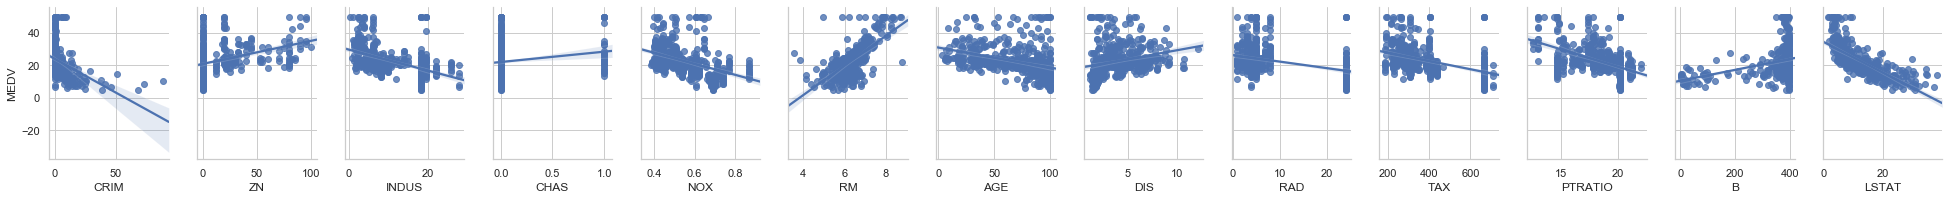

In [169]:
sns.pairplot(df, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 
             y_vars='MEDV', 
             height=3, aspect=.7, kind ='reg');

In [167]:
regr.predict(X_test[:5])

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577])

In [173]:
rf = RandomForestRegressor(n_estimators=50, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [177]:
rf.score(X_test, y_test)

0.8610184974905946

In [180]:
rf = RandomForestRegressor(n_estimators=40, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [181]:
rf.score(X_test,y_test)

0.8563168210398424

In [182]:
rf = RandomForestRegressor(n_estimators=30, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [183]:
rf.score(X_test,y_test)

0.8519253298909585

In [184]:
rf = RandomForestRegressor(n_estimators=60, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [185]:
rf.score(X_test,y_test)

0.8610184974905946